Sentiment = author saying something positive/negative

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [9]:
df= pd.read_csv(r"C:\Users\yarde\Downloads\movie_reviews.csv")
df.sample(10)
#0 = negative review, 1=positive review

,text,label
1603,"The second ""Mr. Eko"" episode has somewhat less...",1
3361,There are enough sad stories about women and t...,1
3695,"I watched this film, along with every other ad...",0
3486,There just isn't enough here. There a few funn...,0
1292,There is a reason why the world forgot these c...,0
501,Something does not work in this movie. There a...,0
2799,"I mean the word ""pedestrian"". Seems the produc...",0
377,"well, i said it all in the summary, i simpley ...",1
3875,This is a little slow-moving for a horror movi...,0
1685,"""Boy Next Door"" is a hilarious romp through ma...",1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4000 non-null   object
 1   label   4000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.6+ KB


In [11]:
df['label'].value_counts(normalize=True)

label
0    0.5085
1    0.4915
Name: proportion, dtype: float64

***most popular words, more frequenly across all***

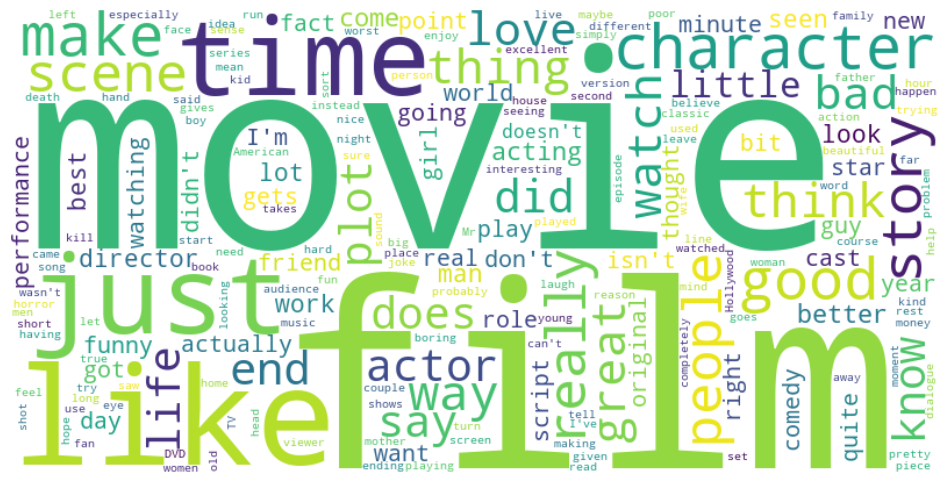

In [12]:
#join all the reviews to one big string that contains all the words across all reviews
reviews= " ".join(df['text'])
#StopWords are common language words that aren't informative to help the process: "the" "or" (strip them away from the analysis)
word_cloud= WordCloud(background_color='white',
                     stopwords=ENGLISH_STOP_WORDS,
                     width=800,
                     height=400)
word_cloud.generate(reviews)
plt.rcParams["figure.figsize"] = (12,8)
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

***Pre- Processing***

Tfidf = calculate the importance of words in different sets of text\documents

In [20]:
#find anything that meet within the [], find any group of letters from a to z and break that pattern apart = regular expression pattern
pattern = r"[a-zA-Z]+"

vect = TfidfVectorizer(
    token_pattern=pattern,
    #remove common English stopwords
    stop_words='english',
    #single words and pairs should be considered as features
    ngram_range=(1,2),
    #top 500 most frequent tokens
    max_features=500)

#transforms the text data into a TF-IDF matrix
tokenized_features = vect.fit_transform(df["text"])
#convert to DataFrame where each column represents a feature (token) and each row represents a document
features = pd.DataFrame(data=tokenized_features.toarray(),
                        columns=vect.get_feature_names_out())
features
#higher TF-IDF= more significant & relevant to thetopic of the document. lower TF-IDF= less important & common or generic terms.

,able,absolutely,act,acting,action,actor,actors,actress,actually,add,...,wouldn t,writer,writing,written,wrong,year,year old,years,yes,young
0,0.000000,0.073909,0.077820,0.140430,0.062353,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.086017,...,0.000000,0.0,0.0,0.158546,0.0,0.0,0.0,0.059755,0.080679,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.109195,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.151444,0.0,0.000000,0.000000,...,0.220499,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.138907,0.000000,0.140286,0.000000,0.000000,0.000000,0.097776,0.0,0.201605,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110813,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.113823,0.000000,0.0
3996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
3997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
3998,0.000000,0.000000,0.000000,0.169746,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0


In [21]:
#check how long the review is, \S=anything that's not space
df["char_count"] = df["text"].str.count(r"\S")
df["word_counts"]= df["text"].str.count(pattern)
df["avg_word_length"]= df["char_count"]/ df["word_counts"]
df.sample(2)
#check if happy people have less to say: shorter review = positive?

,text,label,char_count,word_counts,avg_word_length
398,I thoroughly enjoyed A Man Called Horse when i...,0,871,185,4.708108
3719,"When I first heard about ""Greek,"" I figured I ...",1,876,201,4.358209


***Fit a model and evaluate its performance***

In [22]:
#concat features to char_count onwards
X=pd.concat([features, df.loc[:,"char_count":]], axis=1)
y=df["label"]
X

,able,absolutely,act,acting,action,actor,actors,actress,actually,add,...,written,wrong,year,year old,years,yes,young,char_count,word_counts,avg_word_length
0,0.000000,0.073909,0.077820,0.140430,0.062353,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1646,380,4.331579
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.086017,...,0.158546,0.0,0.0,0.0,0.059755,0.080679,0.0,2735,610,4.483607
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.109195,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,807,174,4.637931
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.151444,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,556,131,4.244275
4,0.138907,0.000000,0.140286,0.000000,0.000000,0.000000,0.097776,0.0,0.201605,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1074,240,4.475000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110813,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.113823,0.000000,0.0,672,172,3.906977
3996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1158,251,4.613546
3997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,803,170,4.723529
3998,0.000000,0.000000,0.000000,0.169746,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1031,233,4.424893


Random Forest Classifier: RandomForestClassifier is an ensemble learning method that builds multiple decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It combines the predictions of multiple decision trees to improve the overall performance and generalization of the model.

In [24]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)
#uses number of decision trees to define classifiers
rf= RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred= rf.predict(X_test)
#matrix of our predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       523
           1       0.76      0.80      0.78       477

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.78      1000
weighted avg       0.79      0.79      0.79      1000



accuracy of almost 80% = 80% of the time we're correctly predicting the review

recall: we don't have any issue predicting one class or another. recall of positive reviews in 81% out of all positive reviews`,

Text(0.5, 1.0, 'Confusion Matrix')

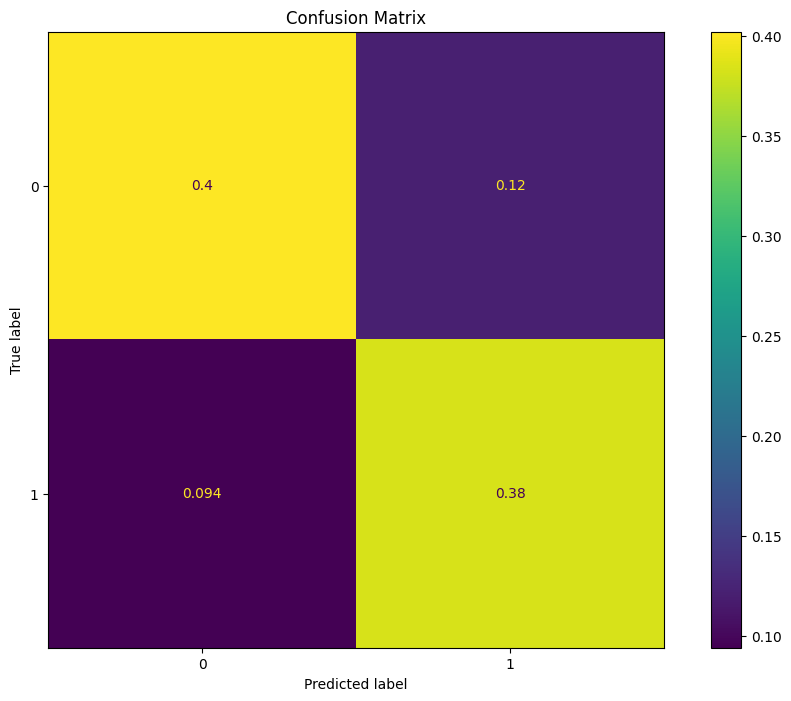

In [25]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, normalize="all")
plt.title("Confusion Matrix")

40% of predictions correctly predicted negative reviews as negative

39% of predictions correctly predicted positive reviews as positive

12% of predictions incorrectly predicted a negative reviews as positive

9% of predictions incorrectly predicted a positive reviews as negative

***DataFrame of the features and their importances***

In [28]:
#how much each feature contributed to the classifications- which ones are most important in predicting weather a review is positive or negative
important_words= pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_}).sort_values(by="Importance", ascending=False)
important_words[:10]

,Feature,Importance
27,bad,0.045045
487,worst,0.031163
174,great,0.021562
415,t,0.016111
25,awful,0.015166
467,waste,0.013414
33,best,0.012233
129,excellent,0.011048
282,movie,0.010560
40,boring,0.009950
